# <파이토치 첫걸음>을 처음부터 천천히 따라갈거에요

# Ch1. 딥러닝이란
MLP 은닉층 1개 이상을 딥러닝이라 불러

학습의 종류
- 지도 학습
- 비지도 학습
- 강화학습

아이디어는 60-70부터 있었지만 최근 연산능력 향상

# ch2. Pytorch

2017 공개된 딥러닝 프레임워크 - FB AI research

torch : 루아 언어로 되어 있어

연산 자동화, GPU 내장 (CUDA, cuDNN)

TensorFlow : Define and Run vs 'Define by Run'

설치는 아나콘다 -> CUDA -> cuDNN -> Pytorch

In [3]:
import torch
cpu_tensor = torch.zeros(2,3)
device = torch.device("cuda:0")
gpu_tensor = cpu_tensor.to(device)
print(gpu_tensor)

tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


# Ch3. Linear Regression
## 3.1

y = wx + b 의 형태

w : weight (가중치), b : bias (편차)

## 3.2

일반적으로 MSE (Mean Squared Error, 평균제곱오차 = L2 norm)를 사용
\begin{align}
MSE = \frac{1}{n} \sum_{i=1}^n \left( \hat{y} - y \right)^2
\end{align}

오차를 나타내는 것이 loss fuction ( or cost fuction) 

최적의 $w$ 를 찾기 위해 $ w = \left( x^T x \right)^{-1} x^T y $ 를 풀어야 하는데 이는 복잡도 $ O \left( n^3 \right) $

그래서 보통 Gradient Descent (경사하강법)을 사용

\begin{align}
w_{t+1} = w_t - gradient \times learning rate
\end{align}

## 3.3

In [14]:
# z= 2x^2+3이라는 식에서 x에 대한 기울기를 구하는 코드

#import torch
x1 = torch.tensor(data=[2.0,3.0],requires_grad=True)
y1 = x1**2
z1= 2*y1+3

target = torch.tensor([3.0,4.0]) #여기서 target의 효용을 모르겠어 책에서 설명도 좀 이상해
loss = torch.sum(torch.abs(z1-target)) 
loss.backward()

print(x1.grad, y1.grad, z1.grad)

tensor([ 8., 17.], grad_fn=<SubBackward0>)
tensor([ 8., 12.]) None None


__loss.backward()__ computes __dloss/dx__ for every parameter **x** which has __requires_grad=True__

- 선형 회귀분석 모델

In [26]:
#import torch
import torch.nn as nn #뉴럴넷 모델 라이브러리
import torch.optim as optim #경사하강법 알고리즘이 들어있대 최적화 방법들 있는듯
import torch.nn.init as init #텐서 초기값을 주기 위한 함수들

num_data=1000
num_epoch = 500

x=init.uniform_(torch.Tensor(num_data,1),-10,10) #uniform dist에서 1000개 sample
noise =init.normal_(torch.FloatTensor(num_data,1),std=1) #Normal(0,1)에서 1000개 
y=2*x+3
y_noise = 2*(x+noise)+3

model = nn.Linear(1,1) # size of in/out , 세번째에선 bias=True : 상수항 넣을 건지
loss_func = nn.L1Loss() #L1 norm loss

optimizer = optim.SGD(model.parameters(),lr=0.01) 
#Stocatic Gradient Descent 옵티마이저를 쓸거임

In [28]:
label = y_noise
for i in range(num_epoch): # epoch [에폭] : 데이터 전체를 한번 사용하는 주기
    optimizer.zero_grad() # 지난번에 계산한 기울기(라는 표현이 모델에서 쓰이는듯)를 0으로
    output = model(x)
    
    loss = loss_func(output,label)
    loss.backward()
    optimizer.step()
    
    if i%10 == 0 : 
        print("epoch : ", i, "\t loss : ",loss.data)
        param_list = list(model.parameters())
        print(param_list[0].item(),param_list[1].item())

epoch :  0 	 loss :  tensor(1.6424)
2.00048828125 2.507828950881958
epoch :  10 	 loss :  tensor(1.6385)
1.9981105327606201 2.527409315109253
epoch :  20 	 loss :  tensor(1.6350)
1.9971508979797363 2.5460290908813477
epoch :  30 	 loss :  tensor(1.6319)
1.9983372688293457 2.563549041748047
epoch :  40 	 loss :  tensor(1.6290)
1.9990203380584717 2.5805282592773438
epoch :  50 	 loss :  tensor(1.6263)
1.9998046159744263 2.5968282222747803
epoch :  60 	 loss :  tensor(1.6239)
1.9998785257339478 2.6123077869415283
epoch :  70 	 loss :  tensor(1.6216)
2.0012855529785156 2.6272873878479004
epoch :  80 	 loss :  tensor(1.6194)
2.002274513244629 2.641928195953369
epoch :  90 	 loss :  tensor(1.6175)
2.0029492378234863 2.6556878089904785
epoch :  100 	 loss :  tensor(1.6157)
2.001983642578125 2.6690869331359863
epoch :  110 	 loss :  tensor(1.6139)
2.0010180473327637 2.682486057281494
epoch :  120 	 loss :  tensor(1.6121)
2.0006368160247803 2.6958250999450684
epoch :  130 	 loss :  tensor(1.610

# Ch4. 인공 신경망
## 4.2 인공신경망

각 은닉층에서 
\begin{align}
y = w_2 \left( \sigma \left( w_1 \times x + b_1 \right) \right) + b_2
\end{align}
같이 구성되고 단순히 Linear combination이 아니기 위해서는 활성화 함수 $ \sigma $ 가 필요하다. 그 예로는 logistic(sigmoid), Hyperbolic tangent(tanh), ReLU (Rectified Linear Unit) 등이 있다.

## 4.3 전파와 역전파 (forward/backward propagation)
각 은닉층 __$ i $__ 마다 가중치 매트릭스 __$ W_i $__ 가 곱해지는 과정이 전파(순전파

chain rule을 통해 __$ \frac{ \partial z }{\partial x} = \frac{ \partial z }{\partial y} \frac{ \partial y }{\partial x} $__ 써서 역으로 계산하는 과정이 역전파

## 4.4 모델 구현, 학습 및 결과 확인

전파-역전파의 과정을 pytorch에서는 __loss.backward()__ 하나로 해결!


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

num_data = 1000
num_epoch = 10000
#print("torch initiral seed : ", torch.initial_seed())
#print("torch CUDA initiral seed : ", torch.cuda.initiral_seed())
torch.manual_seed(1)


noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
x = init.uniform_(torch.Tensor(num_data,1),-15,15)
y = (x**2) +3
y_noise = y + noise

model = nn.Sequential(
        nn.Linear(1,6),
        nn.ReLU(),
        nn.Linear(6,10),
        nn.ReLU(),
        nn.Linear(10,6),
        nn.ReLU(),
        nn.Linear(6,1)
    ) #Sequential을 통해 인공 신경망 순서대로 구성

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.0002)

loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    loss = loss_func(output,y_noise)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)

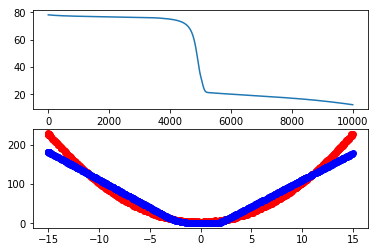

In [12]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(loss_array)

plt.subplot(212)
plt.plot(x,y_noise,'ro')
plt.plot(x,model(x).detach().numpy(),'bo') # ReLU() 덕에 non-linear한 shape이 나타나게 됨